# 02. EDA
Get familiar woth the data for potential feature engineering

In [22]:
# change wd to repo home
import os
if os.getcwd().split('\\')[-1] == 'notebooks':
    os.chdir('..')

In [23]:
from modules.fm_functions import *

Load data

In [50]:
import pandas as pd
combined_data = pd.read_csv('./data/combined_data.csv', index_col='Name').iloc[:, 1:].dropna(axis=0)

In [51]:
combined_data.head()

,team_cluster,defense_Blocks_Blocks,defense_Tackles_Tkl,defense_Tackles_TklW,defense_Tackles_Def 3rd,defense_Tackles_Mid 3rd,defense_Tackles_Att 3rd,defense__Int,defense__Clr,possession_Touches_Def Pen,...,Work Rate,Positioning,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength
Name,,,,,,,,,,,,,,,,,,,,,
Youcef Belaïli,1,0.513527,0.512050,0.419222,0.099565,0.609974,0.616573,0.164482,0.033113,0.005737,...,12,11,14,14,12,9,12,14,13,11
Romain Hamouma,1,0.437854,0.242553,0.134042,0.106117,0.216704,0.219048,0.070122,0.000000,0.000000,...,13,6,14,14,12,8,13,13,12,12
Youssouf Koné,1,0.580240,1.000000,1.000000,1.000000,0.340354,0.000000,0.495600,0.674216,0.201548,...,14,10,14,12,12,9,14,14,15,13
Thomas Mangani,1,0.975392,0.785929,0.615300,0.401151,0.877716,0.266163,0.681635,0.298842,0.131353,...,17,13,12,11,14,12,14,11,15,14
Riad Nouri,1,0.279058,0.405789,0.341717,0.157807,0.460373,0.279212,0.335181,0.094644,0.024060,...,12,6,13,15,12,8,14,13,12,11


In [52]:
X = combined_data[all_stats_columns]
y = combined_data[FM_columns[2:]]

In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)

# Fit the model
mlp.fit(X_train, y_train)

# Predict the target values
y_pred = mlp.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3.833527616325961


c:\Users\alibe\miniconda3\envs\fbref\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from modules.fm_functions import *

c:\Users\alibe\miniconda3\envs\fbref\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


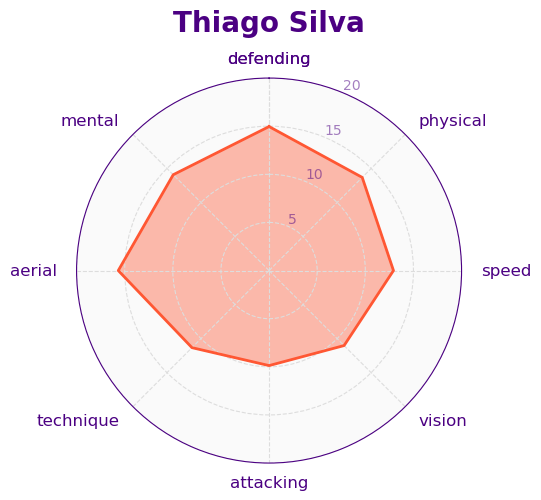

In [89]:
test_name = 'Thiago Silva'

predictions = mlp.predict(X.loc[[test_name]].values)

test = pd.Series(predictions[0], index=y.columns)
test['Name'] = test_name
test = calculate_skill_nodes(test)
plot_fm_radar(test, gk=False)

{'name': 'Lionel Messi',
 'defending': 6.302121108368615,
 'physical': 13.006493051130658,
 'speed': 14.413258383540548,
 'vision': 16.71337383088184,
 'attacking': 14.495004975815473,
 'technique': 16.84441398036526,
 'aerial': 8.106962126746843,
 'mental': 12.929323119215294}